In [ ]:
%pip install tensorflow numpy matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models # pylint: disable=E0611
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_label),(test_iamges,test_label)=tf.keras.datasets.cifar10.load_data()

train_images=train_images/127.5 -1
test_images=test_iamges/127.5 -1

classes=('plain','car','bird','cat','deer','dog','frog','horse','ship','truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# @title
# train_images.shape,train_label.shape
test_images.shape,test_label.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
train_images.shape,test_iamges.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

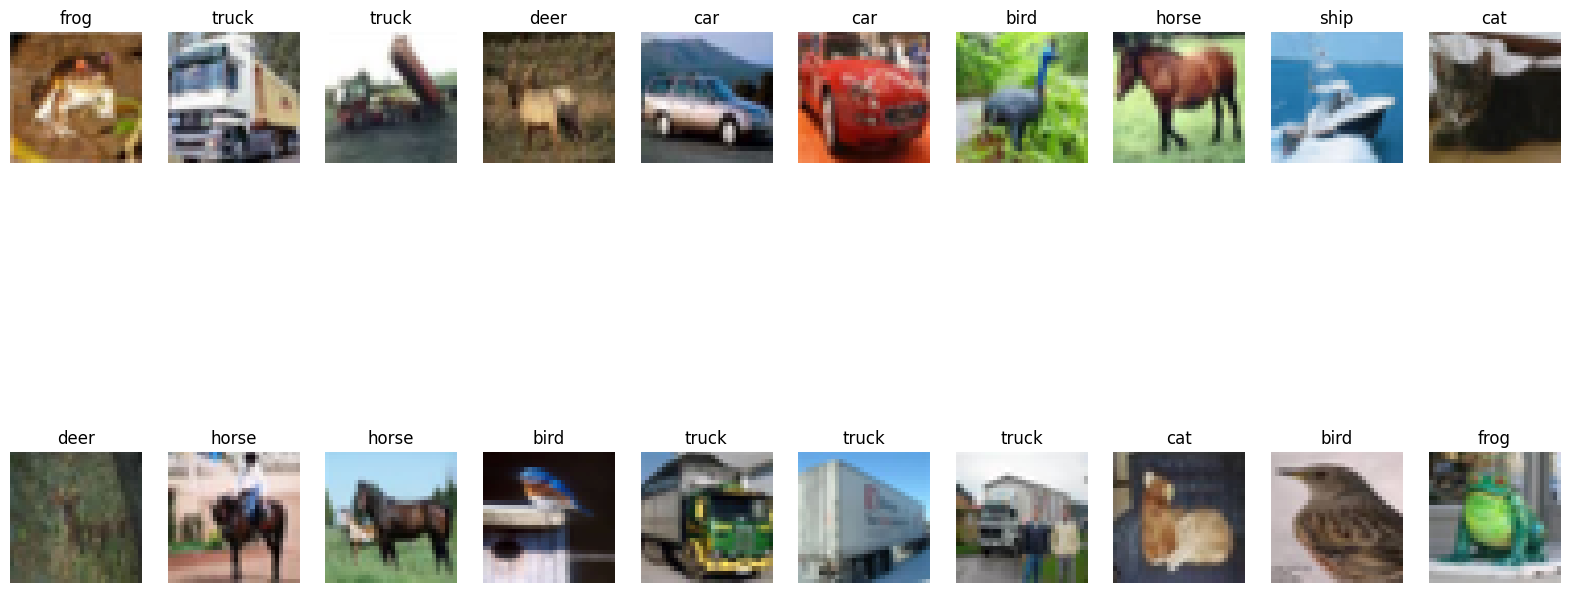

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(20, 10))
axes = axes.flatten() # Flatten the 2x10 array of axes for easy iteration

for i in range(20): # Display 20 images in total (2 rows * 10 columns)
    image = train_images[i]
    denormalize_image = (image + 1) / 2
    axes[i].imshow(denormalize_image)
    axes[i].set_title(classes[train_label[i][0]])
    axes[i].axis('off')



In [ ]:
# model=models.Sequential(
#     [
#         layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPooling2D((2, 2), strides=(2,2)),
#         layers. Conv2D(128, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2), strides=(2,2)),
#         layers. Flatten(),
#         layers.Dense(120, activation='relu'),
#         layers.Dense(84, activation='relu'),
#         layers.Dense(10, activation='softmax' )
#     ]
# )



# vggnet
# model = models.Sequential([
#     layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
#     layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(128, (3,3), activation='relu', padding='same'),
#     layers.Conv2D(128, (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2,2)),

#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])


# deeper cnn
# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
#     layers.Conv2D(32, (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.25),

#     layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.25),

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='softmax')
# ])


# pretrined

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Pretrained base (ImageNet weights)
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(96, 96, 3))

base_model.trainable = False  # Freeze pretrained layers

# Build model
model = models.Sequential([
    layers.Resizing(96, 96),  # Resize from (32,32) → (96,96)
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])





In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_label,epochs=20,validation_data=(test_images,test_label))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.7201 - loss: 0.8710 - val_accuracy: 0.8458 - val_loss: 0.4511
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8125 - loss: 0.5382 - val_accuracy: 0.8505 - val_loss: 0.4348
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8288 - loss: 0.5005 - val_accuracy: 0.8591 - val_loss: 0.4070
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8340 - loss: 0.4907 - val_accuracy: 0.8580 - val_loss: 0.4190
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8422 - loss: 0.4671 - val_accuracy: 0.8671 - val_loss: 0.3868
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8437 - loss: 0.4555 - val_accuracy: 0.8665 - val_loss: 0.3935
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8485 - loss: 0.4468 - val_accuracy: 0.8673 - val_loss: 0.3945
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8526 - loss:

In [ ]:
def view_classification(image,probability):
  fig,(ax1,ax2)=plt.subplots(figsize=(6,9),ncols=2)
  # fig.suptitle("Object Classification",fontsize=20)
  denormalized_image=(image+1)/2
  ax1.imshow(denormalized_image)
  ax1.axis('off')
  ax2.barh(np.arange(10), probability)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(classes)
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

In [ ]:
def imageinput(image):
  resized_image=tf.image.resize(image,(32,32))
  print(resized_image.shape)
  image=(resized_image/127.5)-1
  probability=model.predict(np.array([image]))[0]
  view_classification(image,probability)

(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


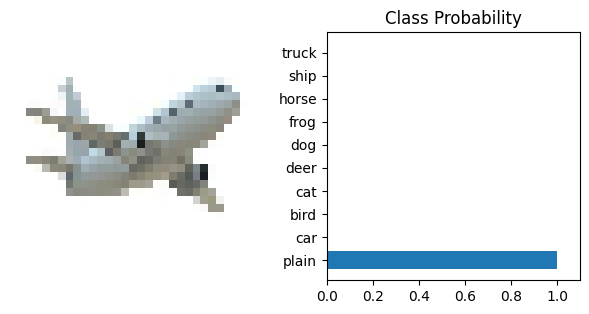

In [ ]:
new_image=plt.imread('palne.jpeg')
imageinput(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


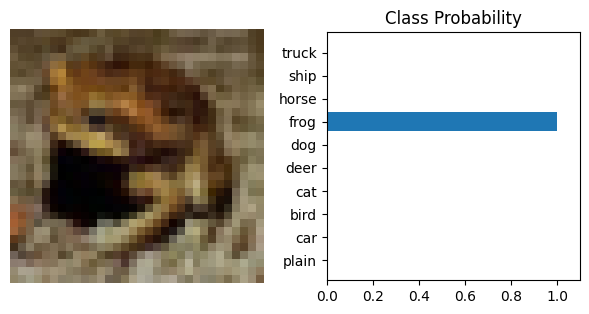

In [ ]:

index=300
image,label=test_images[index],test_label[index][0]
probability=model.predict(np.array([image]))[0]
view_classification(image,probability)

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_label)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8749 - loss: 0.3876
Test accuracy: 0.8709999918937683
